In [74]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
import scikitplot as skl
sns.set()

In [27]:
dta = sm.datasets.fair.load_pandas().data

In [28]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [29]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [30]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [31]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [33]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [34]:
dta.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

### Visualizations

In [32]:
%matplotlib inline

Text(0, 0.5, 'Frequency')

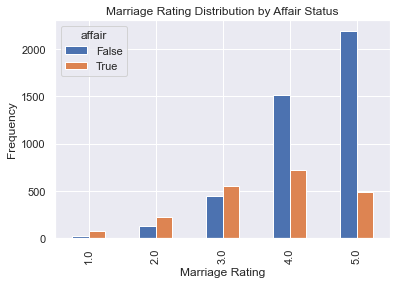

In [40]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

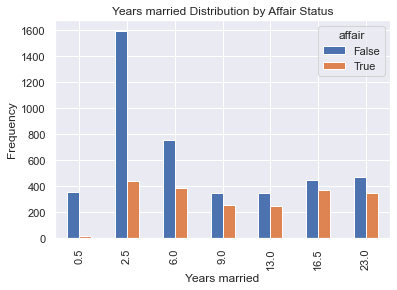

In [50]:
pd.crosstab(dta.yrs_married, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Years married Distribution by Affair Status')
plt.xlabel('Years married')
plt.ylabel('Frequency')

### Handling Categorical variables

In [44]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                 dta, return_type="dataframe")
X.columns
X.head(5)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [47]:
X = X.rename(columns = 
             {'C(occupation)[T.2.0]':'occ_2',
              'C(occupation)[T.3.0]':'occ_3',
              'C(occupation)[T.4.0]':'occ_4',
              'C(occupation)[T.5.0]':'occ_5',
              'C(occupation)[T.6.0]':'occ_6',
              'C(occupation_husb)[T.2.0]':'occ_husb_2',
              'C(occupation_husb)[T.3.0]':'occ_husb_3',
              'C(occupation_husb)[T.4.0]':'occ_husb_4',
              'C(occupation_husb)[T.5.0]':'occ_husb_5',
              'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

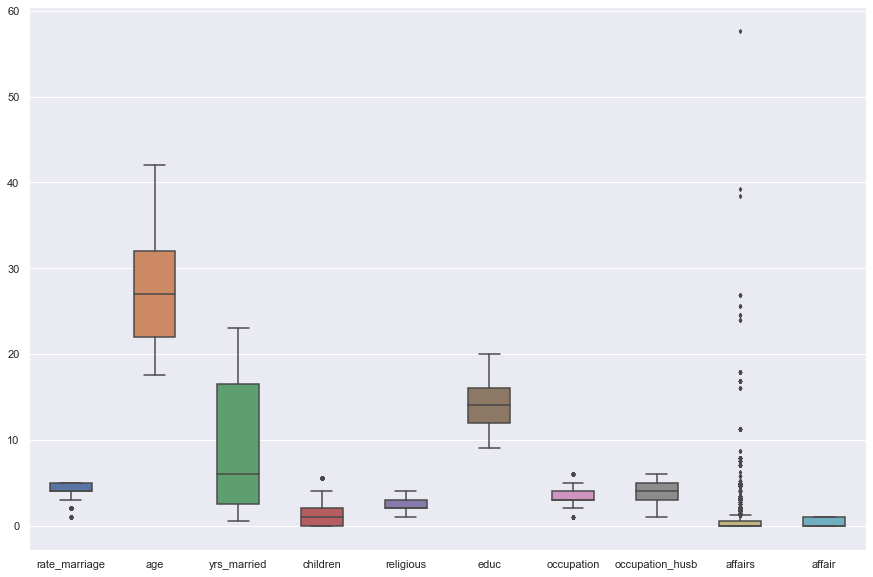

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dta, width= 0.5,ax=ax,  fliersize=3)

In [54]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [55]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\kadiy\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.25, random_state = 355)

In [80]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [81]:
log_reg.score(x_train, y_train)

0.7293674067867616

In [82]:
log_reg.score(x_test, y_test)

0.7204773869346733

In [83]:
predicted = log_reg.predict(x_test)

In [84]:
probs = log_reg.predict_proba(x_test)

In [85]:
# generate evaluation metrics
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test, probs[:, 1]))

0.7204773869346733
0.7353025031234565


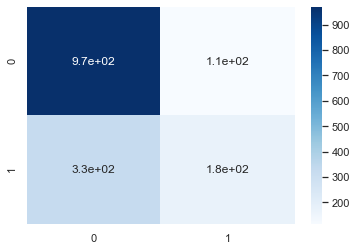

In [86]:
conf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True,cmap='Blues')

In [87]:
conf_matrix

array([[970, 114],
       [331, 177]], dtype=int64)

In [88]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1084
         1.0       0.61      0.35      0.44       508

    accuracy                           0.72      1592
   macro avg       0.68      0.62      0.63      1592
weighted avg       0.70      0.72      0.70      1592



In [89]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X_scaled, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.71899529, 0.70172684, 0.73783359, 0.70643642, 0.70486656,
        0.7299843 , 0.72955975, 0.70597484, 0.75471698, 0.74685535]),
 0.7236949932367722)